[Reference](https://towardsdatascience.com/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0)

# 1. Ordinary Least Squares (OLS)

It is difficult to quantify the evaluation of linear regreesion. But, OLS can help it evaluate the model.

![OLS](https://miro.medium.com/max/1400/1*cfD_EOOIo6sG1Thch6QeTQ.png)

# 2. Gauss-Marcov Assumptions

Here is the general format of OLS:
![GMA](https://miro.medium.com/max/1400/1*BsIOb5DT_4L6ZOqsyK7M7A.png)

If there is an outlier, it is not easy to evaluate the model.
![outlier](https://miro.medium.com/max/1400/1*zvhHrnoVtF8QZrS-tfnIiQ.png)

Gauss-Marcov assumptions have six assumptions:
1. Linearity in parameters.
2. The independent variable x and dependent variable y are both random variables.
3. No perfect collinearity between multiple independent variables x₁ and x₂.
4. The residual term μ is endogenous.
5. Homoscedasticity in residual term μᵢ.
6. No autocorrelation of the residual term μᵢ.



Gauss-Markov assumptions are stricter for time series data in terms of endogeneity, homoscedasticity, and no autocorrelation.

The dataset can be found [here](https://sg.finance.yahoo.com/quote/SPY/history?p=SPY&.tsrc=fin-srch)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     216.1
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.03e-35
Time:                        10:01:53   Log-Likelihood:                -1023.3
No. Observations:                 253   AIC:                             2051.
Df Residuals:                     251   BIC:                             2058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -79.1177     10.939     -7.232      0.0

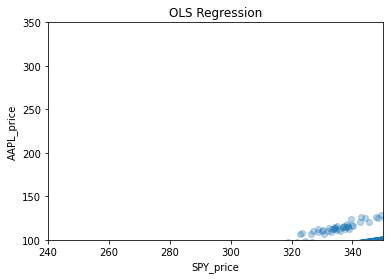

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Date', 'Close'])
SPY_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/SPY.csv',usecols=['Date', 'Close'])

X = sm.add_constant(SPY_price['Close'])
model = sm.OLS(AAPL_price['Close'],X)
results = model.fit()

plt.scatter(SPY_price['Close'],AAPL_price['Close'],alpha=0.3)
y_predict = results.params[0] + results.params[1]*SPY_price['Close']
plt.plot(SPY_price['Close'],y_predict, linewidth=3)

plt.xlim(240,350)
plt.ylim(100,350)
plt.xlabel('SPY_price')
plt.ylabel('AAPL_price')
plt.title('OLS Regression')

print(results.summary())

Let's check R² and F-statistic first. A larger R² indicates the dependent variable is better explained by the independent variables. If we add more independent variables, the resulting R² can be overfitting. So, Adjusted R² can be suggested for a solution.

F statistic tests against the joint effect of the independent variables. A low p-value of F statistic test indicates that the independent variables do not explain the dependent variable well.

And, we can check t-statistic. A good F-statistic and poor t-statistic indicates collinearity.

Lastly, let's check Durbin-Watson and Jarque-Bera. It measures the stationarity and normality of the residual term.

##  Normality test

In [3]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Date', 'Close'])
SPY_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/SPY.csv',usecols=['Date', 'Close'])

X = sm.add_constant(SPY_price['Close'])
model = sm.OLS(AAPL_price['Close'],X)
results = model.fit()

residual = AAPL_price['Close']-results.params[0] - results.params[1]*SPY_price['Close']

print('p value of Jarque-Bera test is: ', stats.jarque_bera(residual)[1])
print('p value of Shapiro-Wilk test is: ', stats.shapiro(residual)[1])
print('p value of Kolmogorov-Smirnov test is: ', stats.kstest(residual, 'norm')[1])

p value of Jarque-Bera test is:  4.670524825145517e-05
p value of Shapiro-Wilk test is:  4.6942762177426545e-12
p value of Kolmogorov-Smirnov test is:  2.2065887467772694e-57


## Homogeneity test

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Date', 'Close'])
SPY_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/SPY.csv',usecols=['Date', 'Close'])

X = sm.add_constant(SPY_price['Close'])
model = sm.OLS(AAPL_price['Close'],X)
results = model.fit()

residual = AAPL_price['Close']-results.params[0] - results.params[1]*SPY_price['Close']

print('p value of Goldfeld–Quandt test is: ', sms.het_goldfeldquandt(results.resid, results.model.exog)[1])
print('p value of Breusch–Pagan test is: ', sms.het_breuschpagan(results.resid, results.model.exog)[1])
print('p value of White test is: ', sms.het_white(results.resid, results.model.exog)[1])

p value of Goldfeld–Quandt test is:  0.2648006449672276
p value of Breusch–Pagan test is:  4.4163662028973546e-13
p value of White test is:  3.02702047119378e-26


## Stationarity test

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Date', 'Close'])
SPY_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/SPY.csv',usecols=['Date', 'Close'])

X = sm.add_constant(SPY_price['Close'])
model = sm.OLS(AAPL_price['Close'],X)
results = model.fit()

import statsmodels.stats.api as sms
print('The Durbin-Watson statistic is: ', sms.durbin_watson(results.resid))
print('p value of Breusch-Godfrey test is: ', sms.acorr_breusch_godfrey(results,nlags=1)[3])

The Durbin-Watson statistic is:  0.018711843498063648
p value of Breusch-Godfrey test is:  1.0540769873752407e-203


When Durbin-Watson statistic is 2, there is no autocorrelation. When Durbin-Watson statistic is towards 0, there is positive autocorrelation.

To explain heteroscedastic error, Weighted Least Squares (WLS) can be used. And, to account for both heteroscedastic error and serial correlated error, Generalized Least Squares (GLS) can be used. 